In [4]:
from PIL import *
import numpy as np
from pylab import *
import cv2
import numpy as num,math
from math import pi,sqrt,exp
from copy import deepcopy
import matplotlib.pyplot as plt
from numpy import matrix
import matplotlib.cm as cm
%matplotlib inline



**Input1.png**

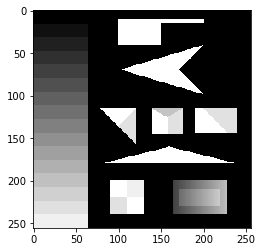

In [5]:
I1 = array(Image.open('/home/srikar/CVV/susan_input1.png'))
imshow(I1,cmap = cm.gray)
S1 = np.shape(I1)

**input2.png**

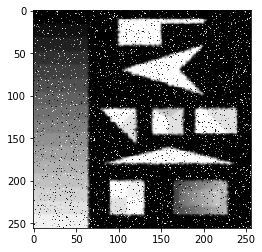

In [14]:
#salt and pepper noise 
I2 = array(Image.open('/home/srikar/CVV/susan_input2.png'))
imshow(I2,cmap = cm.gray)
S2 =np.shape(I2)

28.0
1671998.50756
50845


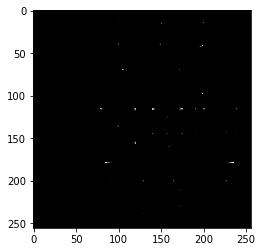

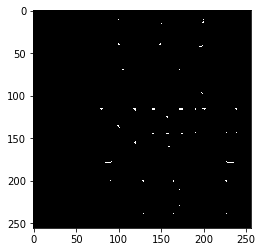

28.0
1671998.50756
50845


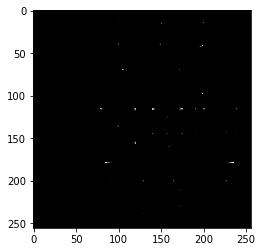

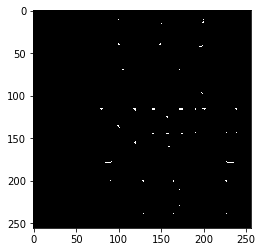

In [21]:
#the header files
from numpy import *
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import os,sys
import scipy.ndimage
import time
import scipy



'''
Implementing the same in a square matrix.
The radius of the mask is 3
susan_mask[0,0] = 0
susan_mask[0,1] = 0
susan_mask[0,5] = 0
susan_mask[0,6] = 0
susan_mask[1,0] = 0
susan_mask[1,6] = 0
susan_mask[5,0] = 0
susan_mask[5,6] = 0
susan_mask[6,0] = 0
susan_mask[6,1] = 0
susan_mask[6,5] = 0
susan_mask[6,6] = 0
'''
def Susan_corner(I1, S1):
    mask_radius = 3
    length = 7 #2*3+1
    maximum = 0
    susan_mask = np.ones((7,7))
    #copying the image into I2
    I1[:] = I2[:]
    R = np.zeros(S1)#stores the distances
    x_min = y_min = mask_radius
    x_max = S1[0] - mask_radius
    y_max = S1[1] - mask_radius

    for i in range(x_min, x_max):
        for j in range(y_min, y_max):
            susan_mask[:] = I1[i-mask_radius:i+mask_radius+1,j-mask_radius:j+mask_radius+1]   #incremeting the individual index starting from the radius
            centre = mask_radius  #the nucleus position
            intensity = susan_mask[mask_radius, mask_radius]  #the intensity of the nucleus pixel

            for m in range(0,length):
                for n in range(0,length):
                    if ((m-centre)*(m-centre)+(n-centre)*(n-centre)<=mask_radius*mask_radius):
                        susan_mask[m][n]=math.exp(-math.pow(((susan_mask[m][n]-intensity)/27),6))#n(r0) formula as given by equation 0.5 and threshold value is found by trial and error method
                    else:
                        susan_mask[m][n] = 0
            susan_mask[mask_radius, mask_radius] = 0
            n_pixel = np.sum(susan_mask)
            R[i][j] = n_pixel
            if maximum < n_pixel:
                maximum = n_pixel
    print (maximum)
    print (np.sum(R))


    #to threshold the matrix USAN
    g = maximum/2
    for i in range(x_min,x_max):
        for j in range(y_min,y_max):
            if(R[i][j] >=g):
                R[i][j] = 0
            else:
                R[i][j] = g - R[i][j]

    print(np.sum(np.nonzero(R)))
    plt.figure()
    plt.imshow(R, cmap = cm.gray)
    plt.show()

    Ix = np.array(np.matrix(R))
    Iy = np.array(np.matrix(R))
    O = np.ones((S1[0], S1[1]), np.float32)
    for i in range(S1[0]):
        for j in range(S1[1]):
            O[i,j] = math.degrees(math.atan2(Iy[i][j], Ix[i][j]))+180

    plt.figure(2)
    plt.imshow(O, cmap = cm.gray)
    plt.show() #showing the raw plotted corners
Image1 = Image.open("/home/srikar/CVV/susan_input1.png").convert('L')
Image2 = Image.open("/home/srikar/CVV/susan_input2.png").convert('L')
I2 = np.array(Image1)
S1 = np.shape(I2)
I1 = np.zeros(S1)
I3 = np.array(Image2)
S2 = np.shape(I3)
I4 = np.zeros(S2)
Susan_corner(I1, S1)
Susan_corner(I4, S2)






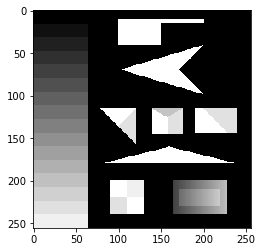

In [9]:
I1 = array(Image.open('/home/srikar/CVV/susan_input1.png'))
imshow(I1,cmap = cm.gray)
S1 = np.shape(I1)

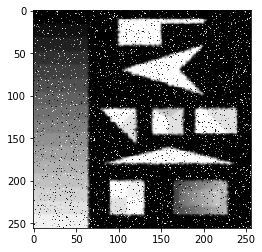

In [10]:
#salt and pepper noise 
I2 = array(Image.open('/home/srikar/CVV/susan_input2.png'))
imshow(I2,cmap = cm.gray)
S2 =np.shape(I2)